# Task-2: Prediction using unsupervised learning

In [1]:
#importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [3]:
#loading dataset
df=pd.read_csv("Iris.csv")
#viewing first 5 rows
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


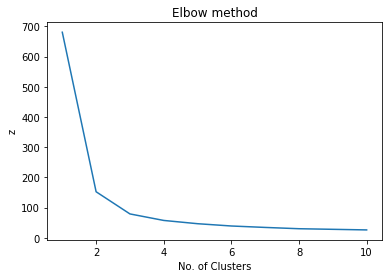

In [6]:
#finding number of clusters required using kmeans clustering
x=df.iloc[:, [1,2,3,4]].values
from sklearn.cluster import KMeans
z=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init= 'k-means++', max_iter=300, n_init=10, random_state= 0)
    kmeans.fit(x)
    z.append(kmeans.inertia_)

#plotting the results of elbow method to observe the curve and find the number of clusters required
plt.plot(range(1,11),z)
plt.title('Elbow method')
plt.xlabel('No. of Clusters')
plt.ylabel('z')
plt.show()

From the above elbow curve we can see the elbow is taking a curve at 3. Therefore the desired number of clusters is 3.
Now we can move on to applying k-means clustering to the Iris dataset.

In [7]:
#Applying kmeans to the iris dataset 
kmeans= KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

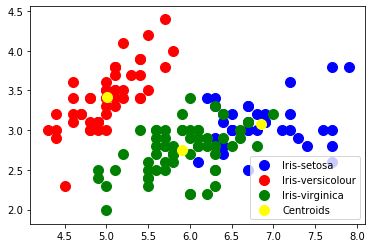

In [13]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()